# Project: "Investigating Netflix Movies and Guest Stars in The Office"

### 1.- Make the data

Imaginary data from a imaginary friend

In [4]:
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years':years, 'durations':durations}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

### 2.- Creating a DF from the dictionary

In [5]:
import pandas as pd

durations_df = pd.DataFrame(movie_dict)
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


### 3.- A visual inspection of the Data

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

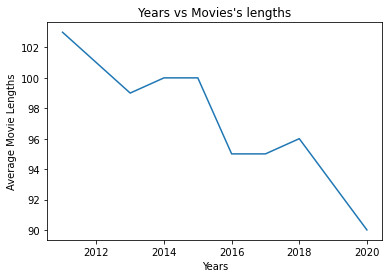

In [18]:
import matplotlib.pyplot as plt

fig = plt.plot(durations_df[['years']],durations_df[['durations']])

plt.xlabel("Years")
plt.ylabel("Average Movie Lengths")
plt.title("Years vs Movies's lengths")

plt.show()

### 4.- Loading the rest of the data from a CSV

Data obtained from: [Qangnn GitHub](https://github.com/qanhnn12/Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office/tree/main/guided_project/datasets)

Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

* What does this trend look like over a longer period of time?
* Is this explainable by something like the genre of entertainment?

In [22]:
netflix_df = pd.read_csv("https://raw.githubusercontent.com/qanhnn12/Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office/main/guided_project/datasets/netflix_data.csv")
print(netflix_df.iloc[:5,:])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

### 5.- Filtering for movies!
* Only Movies selected.
* Only columns: title, country, genre, release_year and duration

In [24]:
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

print(netflix_movies_col_subset.iloc[:5,:])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


### 6.- Creating a scatter plot

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

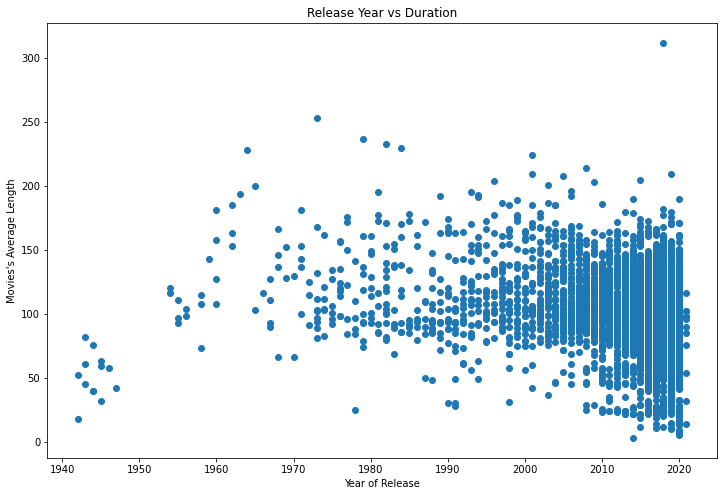

In [29]:
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset[['release_year']],netflix_movies_col_subset[['duration']])
plt.title("Release Year vs Duration")
plt.xlabel("Year of Release")
plt.ylabel("Movies's Average Length")
plt.show()


### 7.- Digging deeper

We can see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

In [31]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]
print(short_movies.iloc[:20,:])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

### 8. Marking non-features films

In [33]:
colors = []
for lab,row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('coral')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('lime')
    else:
        colors.append('dimgray')

print(colors[:10])

['dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'blue']


### 9.- Plotting with color!

No handles with labels found to put in legend.


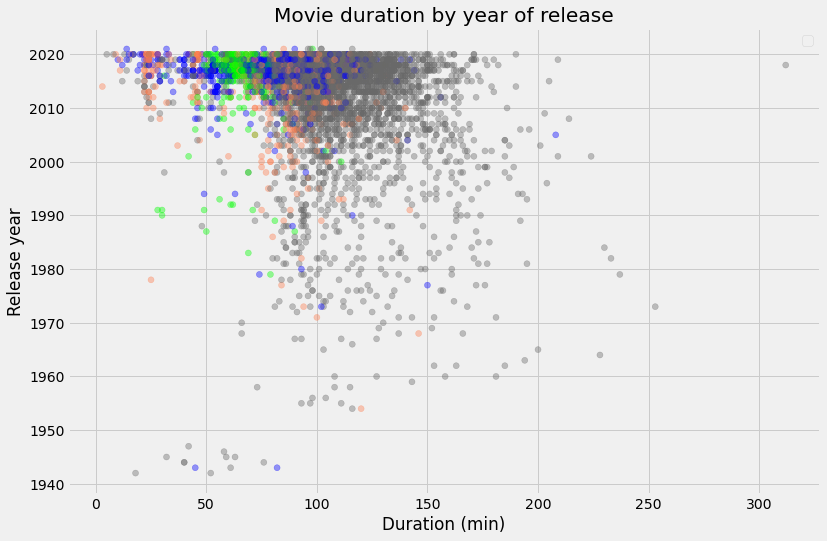

In [40]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset[['duration']], netflix_movies_col_subset[['release_year']], c=colors, alpha=0.4)

plt.title("Movie duration by year of release")
plt.xlabel("Duration (min)")
plt.ylabel("Release year")
plt.show()